In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from joblib import dump, load
from sklearn.metrics import r2_score

In [2]:
sns.set_theme()

# Prepare RF training and test sets

In [3]:
# Read ML input
ml_input = pd.read_csv("agile2024_tn_ml_input.csv", sep=",")
display(ml_input)

,obs_id,site_code,obs_year,obs_value,arable_prop,area,clay1_mean,forest_prop,grassland_prop,k1_mean,...,rock1_mean,sand1_mean,silt1_mean,slope_mean,soc1_mean,temp_mean,twi_mean,urban_prop,water_prop,wetland_prop
0,1,SJA0088000,2016,1.138,0.122,704297025.0,21.031,0.706,0.035,59.083,...,4.072,65.292,13.677,0.875,8.971,6.524,9.851,0.012,0.004,0.084
1,2,SJA0088000,2017,1.175,0.122,704297025.0,21.031,0.706,0.035,59.083,...,4.072,65.292,13.677,0.875,8.971,6.495,9.851,0.012,0.004,0.084
2,3,SJA0106000,2016,5.967,0.428,26553800.0,25.857,0.491,0.025,16.544,...,5.801,55.326,18.817,0.813,8.528,6.231,10.252,0.018,0.000,0.021
3,4,SJA0106000,2017,4.175,0.428,26553800.0,25.857,0.491,0.025,16.544,...,5.801,55.326,18.817,0.813,8.528,6.133,10.252,0.018,0.000,0.021
4,5,SJA0106000,2018,4.225,0.428,26553800.0,25.857,0.491,0.025,16.544,...,5.801,55.326,18.817,0.813,8.528,7.025,10.252,0.018,0.000,0.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,461,SJB3502000,2019,5.347,0.579,18557575.0,25.775,0.322,0.032,40.267,...,8.719,57.976,16.249,0.924,8.993,6.842,10.334,0.023,0.003,0.025
461,462,SJB3502000,2020,5.596,0.579,18557575.0,25.775,0.322,0.032,40.267,...,8.719,57.976,16.249,0.924,8.993,7.783,10.334,0.023,0.003,0.025
462,463,SJB3503000,2020,8.225,0.537,112294125.0,22.755,0.304,0.083,14.110,...,9.007,55.590,21.654,1.292,7.390,7.684,10.033,0.028,0.002,0.014
463,464,SJB3510000,2019,8.090,0.475,29300575.0,21.450,0.303,0.082,24.142,...,8.858,59.238,19.312,1.822,8.315,6.743,9.690,0.025,0.004,0.096


In [4]:
ml_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   obs_id             465 non-null    int64  
 1   site_code          465 non-null    object 
 2   obs_year           465 non-null    int64  
 3   obs_value          465 non-null    float64
 4   arable_prop        465 non-null    float64
 5   area               465 non-null    float64
 6   clay1_mean         465 non-null    float64
 7   forest_prop        465 non-null    float64
 8   grassland_prop     465 non-null    float64
 9   k1_mean            465 non-null    float64
 10  limestone_prop     465 non-null    float64
 11  livestock_density  465 non-null    float64
 12  other_prop         465 non-null    float64
 13  precip_mean        465 non-null    float64
 14  rock1_mean         465 non-null    float64
 15  sand1_mean         465 non-null    float64
 16  silt1_mean         465 non

In [5]:
ml_input[ml_input["temp_mean"].isna()]

,obs_id,site_code,obs_year,obs_value,arable_prop,area,clay1_mean,forest_prop,grassland_prop,k1_mean,...,rock1_mean,sand1_mean,silt1_mean,slope_mean,soc1_mean,temp_mean,twi_mean,urban_prop,water_prop,wetland_prop


C:\Users\Holger\AppData\Local\Temp\ipykernel_12480\3384602531.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ml_input.iloc[:, 4:].hist(ax=ax)


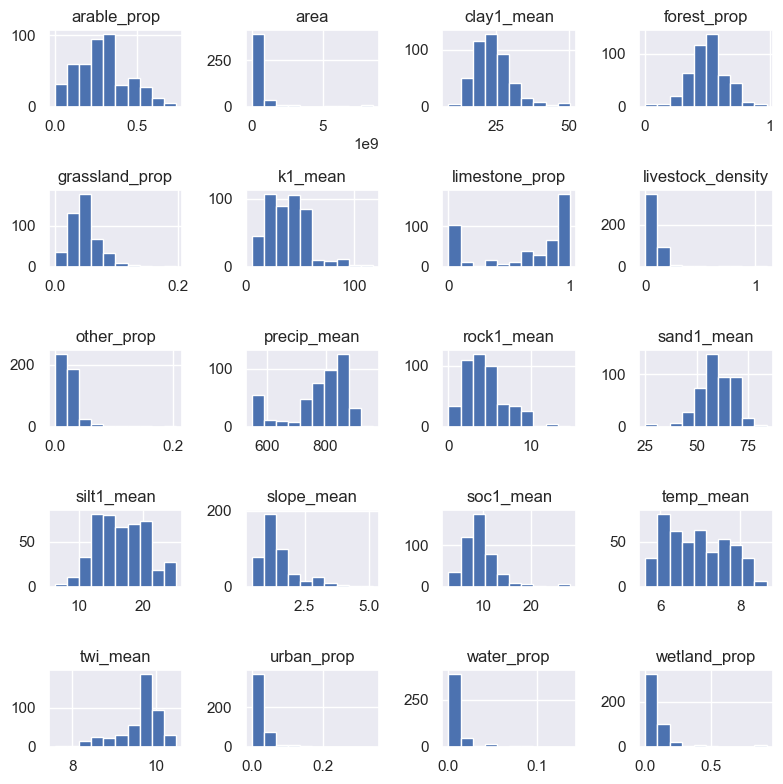

In [6]:
# Plot histograms of features
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ml_input.iloc[:, 4:].hist(ax=ax)
plt.tight_layout()

In [7]:
# Extract features and target
X = ml_input.iloc[:, 4:]
y = ml_input["obs_value"]

In [8]:
# Split the data into training and test sets
test_size = 0.3
random_state = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Hyperparameter tuning

In [9]:
# Number of trees in random forest
n_estimators = list(np.linspace(start=10, stop=100, num=10, dtype=int))

# Number of features to consider at every split
max_features = [1, 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = list(np.linspace(start=10, stop=100, num=10, dtype=int))
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create dictionary from parameters
param_distributions = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [10]:
# Perform search for hyperparameters
estimator = RandomForestRegressor()
rf_random = RandomizedSearchCV(
    estimator=estimator, param_distributions=param_distributions, n_iter=100, verbose=2, random_state=random_state,
    n_jobs=-1
)

In [11]:
%%time

# Get best parameters
rf_random.fit(X_train, y_train)
params = rf_random.best_params_
params['bootstrap'] = True
params['oob_score'] = True

print(rf_random)
print(params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': [1, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=1, verbose=2)
{'n_estimators': 60, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True, 'oob_score': True}
CPU times: total: 781 ms
Wall time: 13.5 s


# Train model

In [12]:
# RF regressor
regressor = RandomForestRegressor()

In [13]:
# Set hyperparameters
regressor.set_params(**params)

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=60, oob_score=True)

In [14]:
# Fit model
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=60, oob_score=True)

In [17]:
# Save model
dump(regressor, "rf_model.joblib")

['rf_model.joblib']

# Assess model accuracy and predict

In [18]:
# Load model
regressor = load("rf_model.joblib")

In [20]:
# Calculate accuracy on training set
regressor.score(X_train, y_train)

0.9263041987073023

In [21]:
# Predict
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)

In [22]:
# Calculate accuracy on test set
r2_score(y_test, Y_test_pred)

0.8126189622388493